# Table of Contents
1. [Introduction](#Introduction)
2. [Data Loading](#Data-Loading)
3. [Exploratory-Data-Analysis](#Exploratory-Data-Analysis)
    1. [UnivariateAnalysis](#UnivariateAnalysis)    
        1. [GRE-Score](#GRE-Score)
        2. [TOEFL-Score](#TOEFL-Score)
        3. [University-Rating](#University-Rating)
        4. [SOP](#SOP)
        5. [LOR](#LOR)
        5. [CGPA](#CGPA)
        6. [Research](#Research)
    2. [Correlation](#Correlation)
4. [Data Preprocessing](#Data-Preprocessing)
    1. [Drop-irrelevant-features](#drop-irrelevant-features)
    2. [MinMaxScaler](#MinMaxScaler)
5. [Modeling](#Modeling)
    1. [Predict_using_OLS](#1.Predict_using_OLS)
        1. [Training](#1.1Training)
        2. [prediction_evaluation](#1.2prediction_evaluation)        
        3. [weights_ols_model](#weights_ols_model)
    2. [Predict_using_LinearRegression](#2.Predict_using_LinearRegression)
        1. [Training](#2.1Training)
        2. [prediction_evaluation](#2.2prediction_evaluation)        
        3. [weights_lr_model](#weights_lr_model)
    3. [Hyperparmeter_tunning_Lasso_Ridge](#Hyperparmeter_tunning_Lasso_Ridge)
        1. [RidgeRegression](#RidgeRegression)
        2. [LassoRegression](#LassoRegression)        

    4. [assumptions_of_linear_regression](#assumptions_of_linear_regression)
        1. [LinearRelationXAndY](#LinearRelationXAndY)
        2. [VIF](#VIF)
            1. [observations_VIF](#observations_VIF)
            1. [ModelWithReducedFeatures](#ModelWithReducedFeatures)
        3. [Normality](#Normality)
            1. [Observation_Normality](#Observation_Normality)
        4. [heteroskedasticity](#heteroskedasticity)
            1. [Observation_heteroskedasticity](#Observation_heteroskedasticity)
        5. [NoAutocorrelation](#NoAutocorrelation)
     
     4. [polynomial_regression](#polynomial_regression)
         1. [HyperparmeterTunning_degree](#6.1HyperparmeterTunning_degree)
         2. [HyperparmeterTunning_lamda](#6.2HyperparmeterTunning_lamda)
         3. [BestParameterModel](#6.3BestParameterModel)
         
     
      
6. [Conclusion](#Conclusion)    
    1. [Models_comparision](#Models_comparision)
    2. [Best_fitted_model](#Best_fitted_model)
    3. [Models_weights](#Mdoels_weights)
    




### Introduction

**Context**

- Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

- They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.


**Features** 

- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)

In [1]:
import pandas as pd
import numpy as np

#ploting
import seaborn as sns
import matplotlib.pyplot as plt
import pylab


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# models
from sklearn.linear_model import  LinearRegression
from sklearn.linear_model import Ridge, Lasso



#metrics
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import shapiro


### Data-Loading

In [2]:
df = pd.read_csv('../data/Jamboree_Admission.csv')
df = df.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'})
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


#### observations


- There are no missing values
- data needs to be normalized (scaled) before applying linear regression model
- all data are of type numberic so no encoding is required


### Exploratory-Data-Analysis

In [6]:
def plot_distributions(feature):
    plt.figure(figsize=(10,2), tight_layout=True)
    plt.subplot(1, 3, 1)
    sns.kdeplot(x=feature, data=df)
    plt.title(f'kdeplot for {feature}')

    plt.subplot(1, 3, 2)
    sns.boxplot(x=feature, data=df)
    plt.title(f'boxplot for {feature}')

    plt.subplot(1, 3, 3)
    stats.probplot(df[feature], dist="norm", plot=pylab)
    plt.show()

In [7]:
def test_normality(feature, alpha=0.05):

    H0 = f"{feature} is normally distributed"
    H1 = f"{feature} is not normally distributed"    
    
    print(f"H0 : {H0}")
    print(f"H1 : {H1}")
    
    test_statistic, p_value = shapiro(df[feature])
    print(f"Shapiro-Wilk Test Statistic: {test_statistic}")
    print(f"p-value: {p_value}")

    # Interpretation

    print(f"alpha = {alpha}")
    
    if p_value < alpha:
         print(f"Reject the null hypothesis as p_value '{p_value}' <  alpha '{alpha}' (data is not normally distributed).")        
    else:
        print(f"Fail to reject the null hypothesis  as p_value '{p_value}' > alpha '{alpha}' (data is normally distributed).")

### GRE-Score

**observations**: 
- mean GRE score is 316
- GRE score is not normally distributed, as p_value "8.212661487050354e-05" is less than alpha=0.05 (Shapiro-Wilk) test 
- no outliers

In [8]:
feature = 'GRE Score'

In [9]:
df[feature].min(), df[feature].median(), df[feature].mean(),  df[feature].max()

(290, 317.0, 316.472, 340)

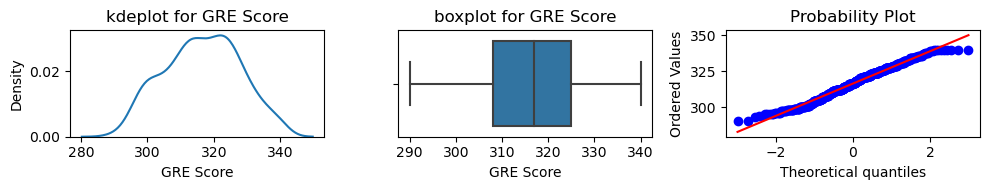

H0 : GRE Score is normally distributed
H1 : GRE Score is not normally distributed
Shapiro-Wilk Test Statistic: 0.9857442378997803
p-value: 8.212661487050354e-05
alpha = 0.05
Reject the null hypothesis as p_value '8.212661487050354e-05' <  alpha '0.05' (data is not normally distributed).


In [10]:
feature = 'GRE Score'
plot_distributions(feature)
test_normality(feature)

### TOEFL-Score

**observations**: 
- mean "TOEFL Score" is 107
- it is not normally distributed as p_value = 8.730924309929833e-05 <  is less than alpha = 0.05.
- no outliers

In [11]:
feature = 'TOEFL Score'

In [12]:
df[feature].min(), df[feature].median(), df[feature].mean(),  df[feature].max()

(92, 107.0, 107.192, 120)

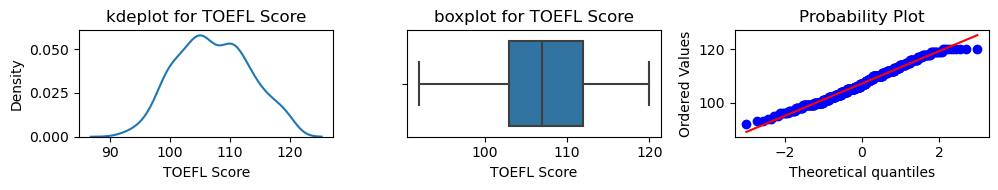

H0 : TOEFL Score is normally distributed
H1 : TOEFL Score is not normally distributed
Shapiro-Wilk Test Statistic: 0.9858347177505493
p-value: 8.730924309929833e-05
alpha = 0.05
Reject the null hypothesis as p_value '8.730924309929833e-05' <  alpha '0.05' (data is not normally distributed).


In [13]:
feature = 'TOEFL Score'
plot_distributions(feature)
test_normality(feature)

### University-Rating

**observations**: 
- rating 3 with 32.4 % values, means have high average rating
- only 6.8% has rated high

In [14]:
df[feature].nunique()

29

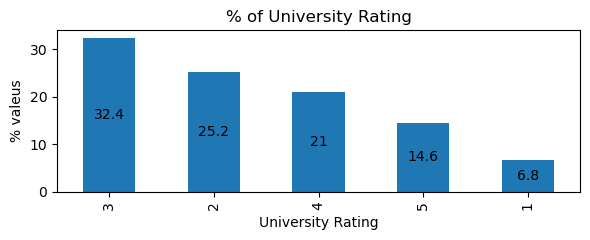

In [15]:
feature = 'University Rating'
plt.figure(figsize=(6,2.5), tight_layout=True)
ax = (df[feature].value_counts(normalize=True)*100).plot(kind='bar')
ax.bar_label(ax.containers[0], label_type='center')
plt.ylabel("% valeus")
plt.title(f"% of {feature}")
plt.show()

### SOP 
Statement of Purpose Strength

**observations**: 
- it is not normally distributed as p_value = 9.5915581033168e-11 < 0.05 alpha (data is not normally distributed).
- no outliers

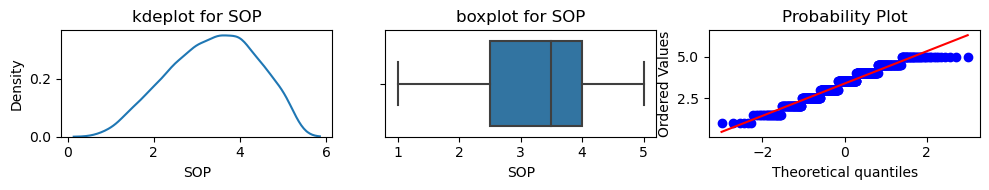

H0 : SOP is normally distributed
H1 : SOP is not normally distributed
Shapiro-Wilk Test Statistic: 0.957966685295105
p-value: 9.5915581033168e-11
alpha = 0.05
Reject the null hypothesis as p_value '9.5915581033168e-11' <  alpha '0.05' (data is not normally distributed).


In [16]:
feature = 'SOP'
plot_distributions(feature)
test_normality(feature)

### LOR
Letter of Recommendation

**observations**: 
- it is not normally distributed as p_value = 2.7075374928187124e-11 < 0.05 alpha (data is not normally distributed).
- no outliers

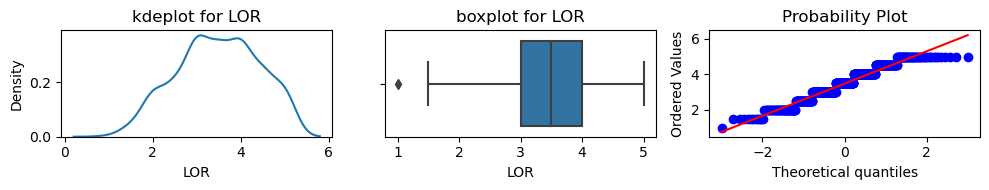

H0 : LOR is normally distributed
H1 : LOR is not normally distributed
Shapiro-Wilk Test Statistic: 0.9544847011566162
p-value: 2.7075374928187124e-11
alpha = 0.05
Reject the null hypothesis as p_value '2.7075374928187124e-11' <  alpha '0.05' (data is not normally distributed).


In [17]:
feature = 'LOR'
plot_distributions(feature)
test_normality(feature)

### CGPA

**observations**: 
- it is not normally distributed as p_value = '0.010292120277881622' <  alpha '0.05' (data is not normally distributed).
- no outliers

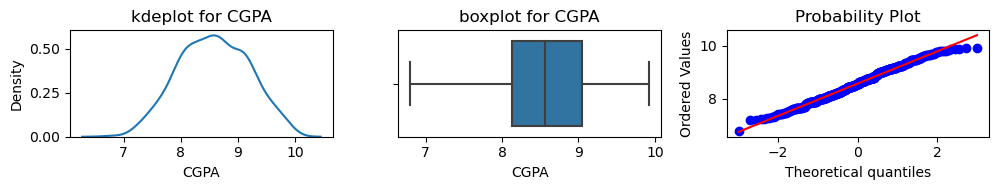

H0 : CGPA is normally distributed
H1 : CGPA is not normally distributed
Shapiro-Wilk Test Statistic: 0.9922108054161072
p-value: 0.010292120277881622
alpha = 0.05
Reject the null hypothesis as p_value '0.010292120277881622' <  alpha '0.05' (data is not normally distributed).


In [18]:
feature = 'CGPA'
plot_distributions(feature)
test_normality(feature)

### Research

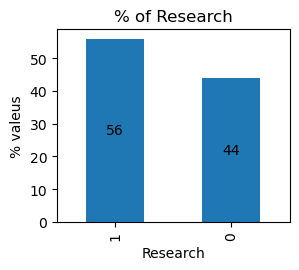

In [19]:
feature = 'Research'
plt.figure(figsize=(3,2.5))
ax = (df[feature].value_counts(normalize=True)*100).plot(kind='bar')
ax.bar_label(ax.containers[0], label_type='center')
plt.ylabel("% valeus")
plt.title(f"% of {feature}")
plt.show()

C:\Users\Upendra\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


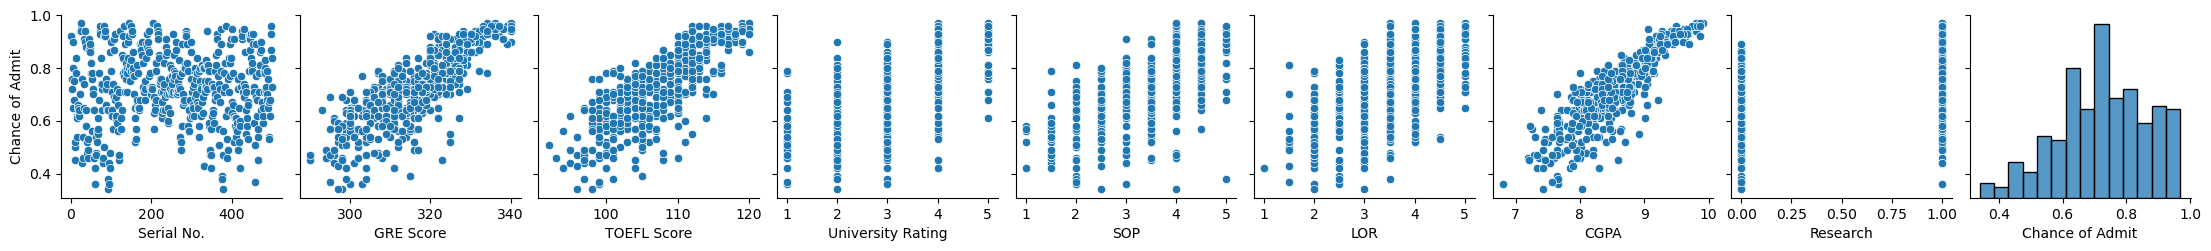

In [20]:
sns.pairplot(df, y_vars='Chance of Admit')
plt.show()

### Correlation

<Axes: >

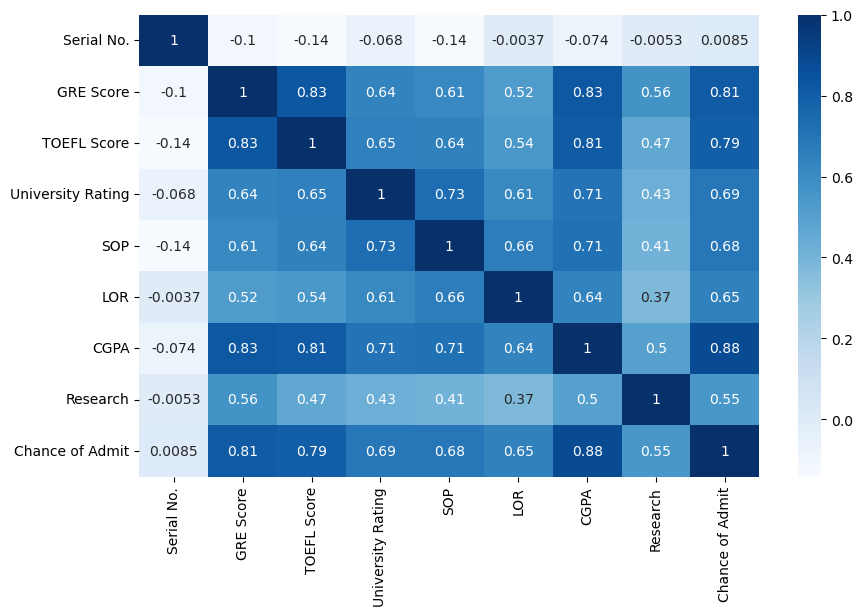

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap="Blues", annot=True)

**Observations**
- Serial No feature can be deleated as it has no significance

## Data Preprocessing

### drop-irrelevant-features


In [22]:
df = df.drop(columns='Serial No.')

In [23]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Modeling

In [24]:
def adj_r2(r2, n, p):    
    ''' n is the sample size and p is the number of independent variables'''
    return 1-(1-r2)*(n-1)/(n-p-1)

In [25]:
comparision_results={}

### 1.Predict_using_OLS

In [26]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns='Chance of Admit')
y = df['Chance of Admit']


#### 1.1Training

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant term (intercept) to the predictors
X_train_scaled_sm = sm.add_constant(X_train_scaled)
X_test_scaled_sm = sm.add_constant(X_test_scaled)

# Fit the OLS model on the training data
ols_model = sm.OLS(y_train, X_train_scaled_sm).fit()

# Print the summary of the model
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     272.1
Date:                Sun, 09 Jun 2024   Prob (F-statistic):          3.33e-146
Time:                        20:52:14   Log-Likelihood:                 573.41
No. Observations:                 400   AIC:                            -1131.
Df Residuals:                     392   BIC:                            -1099.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7221      0.003    247.782      0.0

In [28]:
def calculate_metrics_linear_model(model_name):
    # Calculate metrics for the training data
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_adj_r2 = adj_r2(train_r2, X_train.shape[0], X_train.shape[1])

    # Calculate metrics for the test data
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_adj_r2 = adj_r2(test_r2, X_test.shape[0], X_test.shape[1])
    
    
    print(f"Training MSE: {train_mse}")
    print(f"Training R^2: {train_r2}")
    print(f"Training adj_r2: {train_adj_r2}")

    print(f"Test MSE: {test_mse}")
    print(f"Test R^2: {test_r2}")
    print(f"Training adj_r2: {test_adj_r2}")
    
    comparision_results[model_name] = {
        'train_mse' : train_mse,
        'train_rmse':train_rmse,
        'train_mae':train_mae,
        'train_r2' : train_r2,
        'train_adj_r2' : train_adj_r2,

        'test_mse' : test_mse,
        'test_rmse':test_rmse,
        'test_mae':test_mae,
        'test_r2' : test_r2,
        'test_adj_r2' : test_adj_r2,
    }

#### 1.2prediction_evaluation

In [29]:
# Predict on the training data
y_train_pred = ols_model.predict(X_train_scaled_sm)

# Predict on the test data
y_test_pred = ols_model.predict(X_test_scaled_sm)
calculate_metrics_linear_model('model1_ols')


Training MSE: 0.003329441637724273
Training R^2: 0.829322723369172
Training adj_r2: 0.8262749148579072
Test MSE: 0.0044292854989575765
Test R^2: 0.7927524897595926
Training adj_r2: 0.776983657458692


#### weights_ols_model

In [30]:
df_weights_ols = pd.DataFrame(zip(X_test.columns, ols_model.params[1:].values)).rename(columns={0: 'features', 1: 'weights_ols'})
df_weights_ols

,features,weights_ols
0,GRE Score,0.023376
1,TOEFL Score,0.017767
2,University Rating,0.005559
3,SOP,0.002049
4,LOR,0.016925
5,CGPA,0.067658
6,Research,0.012267


### 2.Predict_using_LinearRegression

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 2.1Training

In [32]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

#### 2.2prediction_evaluation

In [33]:
# Predict on the training data
y_train_pred = model.predict(X_train_scaled)

# Predict on the test data
y_test_pred = model.predict(X_test_scaled)

In [34]:
calculate_metrics_linear_model('model2_lr')

Training MSE: 0.003329441637724273
Training R^2: 0.829322723369172
Training adj_r2: 0.8262749148579072
Test MSE: 0.004429285498957569
Test R^2: 0.792752489759593
Training adj_r2: 0.7769836574586925


In [35]:
model.coef_, model.intercept_

(array([0.02337627, 0.0177666 , 0.00555908, 0.00204946, 0.01692451,
        0.06765792, 0.01226737]),
 0.722125)

#### weights_lr_model

In [36]:
df_weights_lr = pd.DataFrame(zip(X_test.columns, model.coef_)).rename(columns={0: 'features', 1: 'weights_lr'})
df_weights_lr

,features,weights_lr
0,GRE Score,0.023376
1,TOEFL Score,0.017767
2,University Rating,0.005559
3,SOP,0.002049
4,LOR,0.016925
5,CGPA,0.067658
6,Research,0.012267


### Hyperparmeter_tunning_Lasso_Ridge

In [37]:

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of alpha values
alpha_values = np.logspace(-4, 4, 50)

# Initialize lists to store R² and Adjusted R² scores for Ridge and Lasso
ridge_r2_scores = []
ridge_adj_r2_scores = []
lasso_r2_scores = []
lasso_adj_r2_scores = []

# Number of observations and predictors
n = X_test_scaled.shape[0]
p = X_test_scaled.shape[1]

# Loop through the alpha values for Ridge
for alpha in alpha_values:
    # Ridge regression
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge_reg.predict(X_test_scaled)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    adj_r2_ridge = 1 - ((1 - r2_ridge) * (n - 1) / (n - p - 1))
    ridge_r2_scores.append(r2_ridge)
    ridge_adj_r2_scores.append(adj_r2_ridge)

# Loop through the alpha values for Lasso
for alpha in alpha_values:
    # Lasso regression
    lasso_reg = Lasso(alpha=alpha, max_iter=10000)
    lasso_reg.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso_reg.predict(X_test_scaled)
    r2_lasso = r2_score(y_test, y_pred_lasso)
    adj_r2_lasso = 1 - ((1 - r2_lasso) * (n - 1) / (n - p - 1))
    lasso_r2_scores.append(r2_lasso)
    lasso_adj_r2_scores.append(adj_r2_lasso)



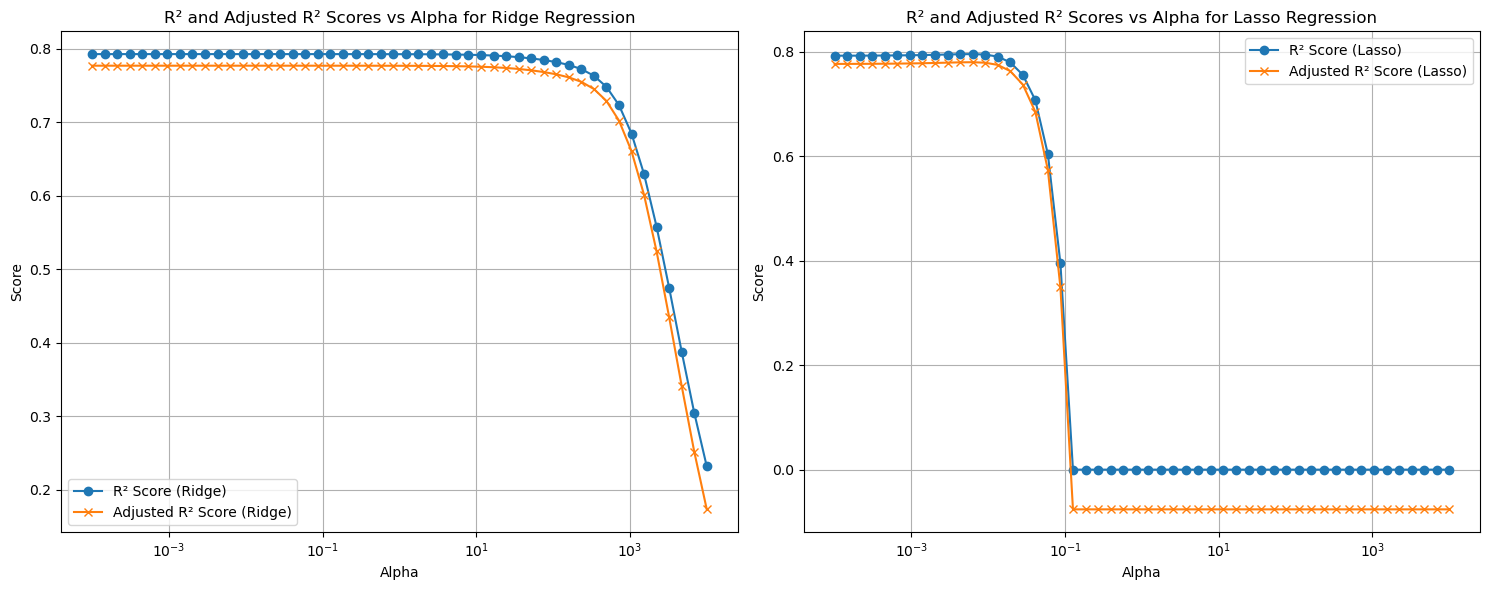

Best R² Score (Ridge): 0.7927524792587938 at Alpha: 0.0001
Best Adjusted R² Score (Ridge): 0.7769836461589193 at Alpha: 0.0001
Best R² Score (Lasso): 0.7959271957201569 at Alpha: 0.0062505519252739694
Best Adjusted R² Score (Lasso): 0.7803999171336471 at Alpha: 0.0062505519252739694


In [38]:

# Plot the results in a single row with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot R² and Adjusted R² for Ridge
axs[0].plot(alpha_values, ridge_r2_scores, marker='o', label='R² Score (Ridge)')
axs[0].plot(alpha_values, ridge_adj_r2_scores, marker='x', label='Adjusted R² Score (Ridge)')
axs[0].set_xscale('log')
axs[0].set_xlabel('Alpha')
axs[0].set_ylabel('Score')
axs[0].set_title('R² and Adjusted R² Scores vs Alpha for Ridge Regression')
axs[0].legend()
axs[0].grid(True)

# Plot R² and Adjusted R² for Lasso
axs[1].plot(alpha_values, lasso_r2_scores, marker='o', label='R² Score (Lasso)')
axs[1].plot(alpha_values, lasso_adj_r2_scores, marker='x', label='Adjusted R² Score (Lasso)')
axs[1].set_xscale('log')
axs[1].set_xlabel('Alpha')
axs[1].set_ylabel('Score')
axs[1].set_title('R² and Adjusted R² Scores vs Alpha for Lasso Regression')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Print the best R² and Adjusted R² scores with their corresponding alpha values for Ridge
best_r2_ridge = max(ridge_r2_scores)
best_alpha_r2_ridge = alpha_values[ridge_r2_scores.index(best_r2_ridge)]
print(f"Best R² Score (Ridge): {best_r2_ridge} at Alpha: {best_alpha_r2_ridge}")

best_adj_r2_ridge = max(ridge_adj_r2_scores)
best_alpha_adj_r2_ridge = alpha_values[ridge_adj_r2_scores.index(best_adj_r2_ridge)]
print(f"Best Adjusted R² Score (Ridge): {best_adj_r2_ridge} at Alpha: {best_alpha_adj_r2_ridge}")

# Print the best R² and Adjusted R² scores with their corresponding alpha values for Lasso
best_r2_lasso = max(lasso_r2_scores)
best_alpha_r2_lasso = alpha_values[lasso_r2_scores.index(best_r2_lasso)]
print(f"Best R² Score (Lasso): {best_r2_lasso} at Alpha: {best_alpha_r2_lasso}")

best_adj_r2_lasso = max(lasso_adj_r2_scores)
best_alpha_adj_r2_lasso = alpha_values[lasso_adj_r2_scores.index(best_adj_r2_lasso)]
print(f"Best Adjusted R² Score (Lasso): {best_adj_r2_lasso} at Alpha: {best_alpha_adj_r2_lasso}")


### RidgeRegression

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
ridge_reg = Ridge(alpha=0.0001)
ridge_reg.fit(X_train_scaled, y_train)

Ridge(alpha=0.0001)

In [41]:
# Predict on the training data
y_train_pred = ridge_reg.predict(X_train_scaled)

# Predict on the test data
y_test_pred = ridge_reg.predict(X_test_scaled)

calculate_metrics_linear_model('model3_Ridge')

Training MSE: 0.003329441637725108
Training R^2: 0.8293227233691292
Training adj_r2: 0.8262749148578636
Test MSE: 0.004429285723380229
Test R^2: 0.7927524792587938
Training adj_r2: 0.7769836461589193


### LassoRegression

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_reg = Lasso(alpha=0.00625)
lasso_reg.fit(X_train_scaled, y_train)

Lasso(alpha=0.00625)

In [43]:
# Predict on the training data
y_train_pred = lasso_reg.predict(X_train_scaled)

# Predict on the test data
y_test_pred = lasso_reg.predict(X_test_scaled)

calculate_metrics_linear_model('model4_Lasso')

Training MSE: 0.003394151674313405
Training R^2: 0.8260054906264279
Training adj_r2: 0.8228984458161855
Test MSE: 0.004361435090659182
Test R^2: 0.7959272293856444
Training adj_r2: 0.7803999533606392


### assumptions_of_linear_regression

In [44]:
df = pd.read_csv('../data/Jamboree_Admission.csv')
df = df.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'})
X = df.drop(columns=['Chance of Admit', 'Serial No.'])
scaler = StandardScaler();
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = df['Chance of Admit']

### LinearRelationXAndY

In [45]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [46]:
def check_LinearRelation_Xy(feature):
    x = X[feature]
    model = sm.OLS(y, x).fit()
    # Predict values
    df['y_pred'] = model.predict(df[feature])

    # Plot the data and the fitted regression line
    plt.figure(figsize=(5,3))
    plt.scatter(df[feature], y, label='Observed data', color='blue')
    plt.plot(df[feature], df['y_pred'], label='Fitted line', color='red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Regression Line for "{feature}"')
    plt.legend()
    plt.show()




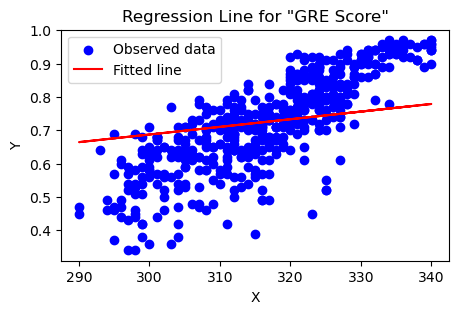

In [47]:
# Fit an OLS model
feature = 'GRE Score'
check_LinearRelation_Xy(feature)


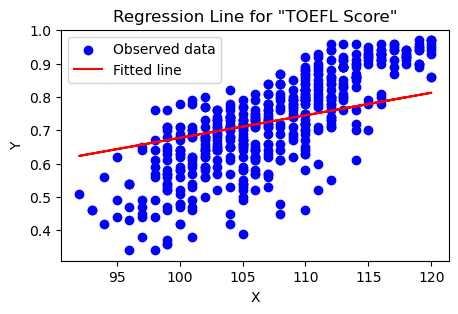

In [48]:
# Fit an OLS model
feature = 'TOEFL Score'
check_LinearRelation_Xy(feature)

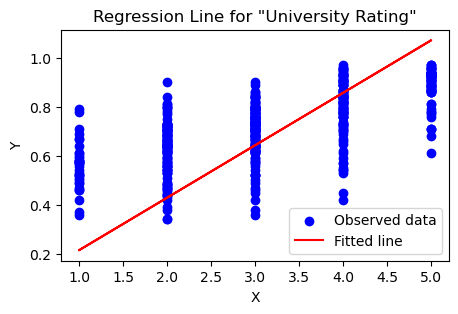

In [49]:
# Fit an OLS model
feature = 'University Rating'
check_LinearRelation_Xy(feature)

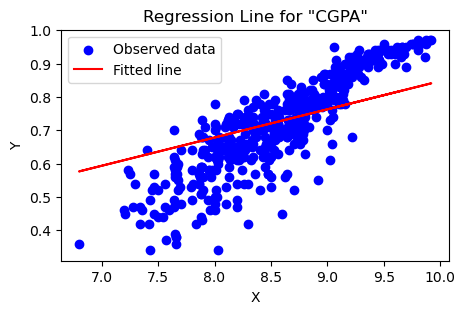

In [50]:
# Fit an OLS model
feature = 'CGPA'
check_LinearRelation_Xy(feature)

#### VIF

In [51]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
df = pd.read_csv('../data/Jamboree_Admission.csv')
df = df.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'})
X = df.drop(columns=['Chance of Admit', 'Serial No.'])
scaler = StandardScaler();
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = df['Chance of Admit']

In [53]:
# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

In [54]:
df_copied = X_scaled.copy()  # Make a copy of the original DataFrame
df_copied.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152


In [55]:
print(calculate_vif(df_copied))

             Feature       VIF
0          GRE Score  4.464249
1        TOEFL Score  3.904213
2  University Rating  2.621036
3                SOP  2.835210
4                LOR  2.033555
5               CGPA  4.777992
6           Research  1.494008


In [56]:
# Set a threshold for VIF
threshold = 5

print(calculate_vif(df_copied))

# Iteratively remove features with high VIF until all VIF values are below the threshold
while True:
    vif_df = calculate_vif(df_copied)
    max_vif_feature = vif_df.loc[vif_df['VIF'].idxmax(), 'Feature']
    max_vif_value = vif_df['VIF'].max()
    if max_vif_value <= threshold:
        break
    df_copied.drop(max_vif_feature, axis=1, inplace=True)

    # Print VIF value and feature name after removing the feature with highest VIF
    print("==>")
    print(f"Removed feature with highest VIF: {max_vif_feature} (VIF: {max_vif_value})")
    print("VIF values after removing feature with highest VIF:")
    print(calculate_vif(df_copied))

             Feature       VIF
0          GRE Score  4.464249
1        TOEFL Score  3.904213
2  University Rating  2.621036
3                SOP  2.835210
4                LOR  2.033555
5               CGPA  4.777992
6           Research  1.494008


#### observations_VIF
-> none of the featues are removed are VIF 

<Axes: >

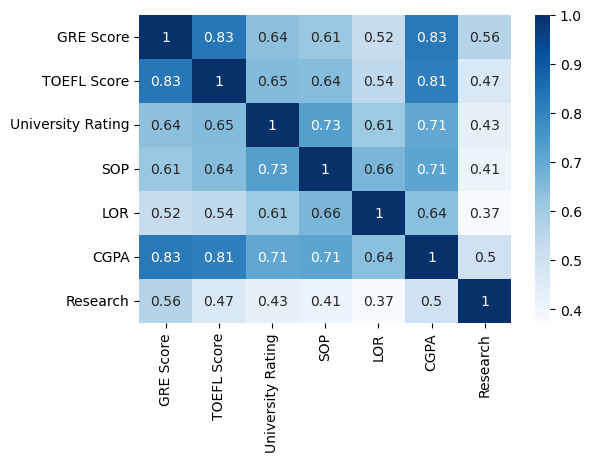

In [57]:
plt.figure(figsize=(6,4))
sns.heatmap(X.corr(), cmap="Blues", annot=True)

In [58]:
X[["GRE Score","TOEFL Score"]].corr()

,GRE Score,TOEFL Score
GRE Score,1.0000,0.8272
TOEFL Score,0.8272,1.0000


In [59]:
X[["SOP","LOR"]].corr()

,SOP,LOR
SOP,1.000000,0.663707
LOR,0.663707,1.000000


#### ModelWithReducedFeatures

In [60]:
print(X.columns)
featues_keep = ['TOEFL Score', 'University Rating', 'SOP', 'CGPA','Research']
X_reduced = X[featues_keep]
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=2)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant term (intercept) to the predictors
X_train_scaled_sm = sm.add_constant(X_train_scaled)
X_test_scaled_sm = sm.add_constant(X_test_scaled)

# Fit the OLS model on the training data
ols_model = sm.OLS(y_train, X_train_scaled_sm).fit()

# Print the summary of the model
print(ols_model.summary())

# Predict on the training data
y_train_pred = ols_model.predict(X_train_scaled_sm)

# Predict on the test data
y_test_pred = ols_model.predict(X_test_scaled_sm)

calculate_metrics_linear_model('model5_VIF')

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     350.0
Date:                Sun, 09 Jun 2024   Prob (F-statistic):          1.78e-142
Time:                        20:52:15   Log-Likelihood:                 558.64
No. Observations:                 400   AIC:                            -1105.
Df Residuals:                     394   BIC:                            -1081.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

### Normality

Text(0.5, 1.0, 'Histogram of residuals test')

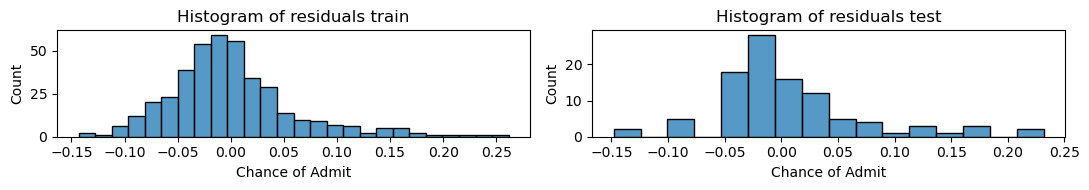

In [61]:
Y_hat = ols_model.predict(X_train_scaled_sm)
errors_train = Y_hat - y_train

Y_hat = ols_model.predict(X_test_scaled_sm)
errors_test = Y_hat - y_test

plt.figure(figsize=(11,2), tight_layout=True)
ax1 = plt.subplot(1,2,1)
sns.histplot(errors_train)
ax1.set_title('Histogram of residuals train')

ax2 = plt.subplot(1,2,2)
sns.histplot(errors_test)
ax2.set_title('Histogram of residuals test')



In [62]:
from scipy import stats
res = stats.shapiro(errors_train)
res.statistic

0.9308221936225891

#### Observation_Normality
    - a value of .93 denotes a high level of normality for the error distribuiton

### heteroskedasticity

In [63]:
Y_hat = ols_model.predict(X_train_scaled_sm)
residuals = Y_hat - y_train

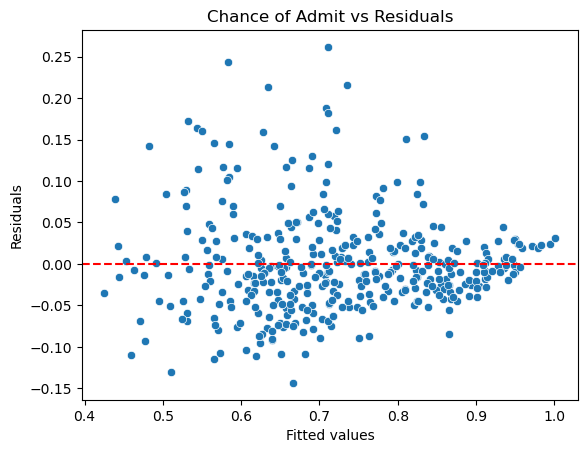

In [64]:
sns.scatterplot(x=Y_hat,y=residuals)
plt.xlabel('Fitted values')
plt.ylabel("Residuals")
plt.title("Chance of Admit vs Residuals")
plt.axhline(y=0, color='r', linestyle='--')

### Observation_heteroskedasticity

In [65]:

# Perform the Goldfeld-Quandt test
gq_test_stat, gq_pval, _ = het_goldfeldquandt(residuals, ols_model.model.exog, split=0.5)
print('Goldfeld-Quandt test F-statistic:', gq_test_stat)
print('Goldfeld-Quandt test p-value:', gq_pval)

# Interpretation for Goldfeld-Quandt Test
if gq_pval < 0.05:
    print("Goldfeld-Quandt Test: The null hypothesis of homoskedasticity is rejected. Heteroskedasticity is present.")
else:
    print("Goldfeld-Quandt Test: The null hypothesis of homoskedasticity is not rejected. No evidence of heteroskedasticity.")


Goldfeld-Quandt test F-statistic: 1.2193425534506543
Goldfeld-Quandt test p-value: 0.0840742775862802
Goldfeld-Quandt Test: The null hypothesis of homoskedasticity is not rejected. No evidence of heteroskedasticity.


### NoAutocorrelation

- Its not a time series data so no Autocorrelation

### polynomial_regression

In [66]:
# Defining our performance metric
def adj_r2(X, y, r2_score):
      return 1 - ((1-r2_score)*(len(y)-1))/(len(y)-X.shape[1]-1)

### 6.1HyperparmeterTunning_degree

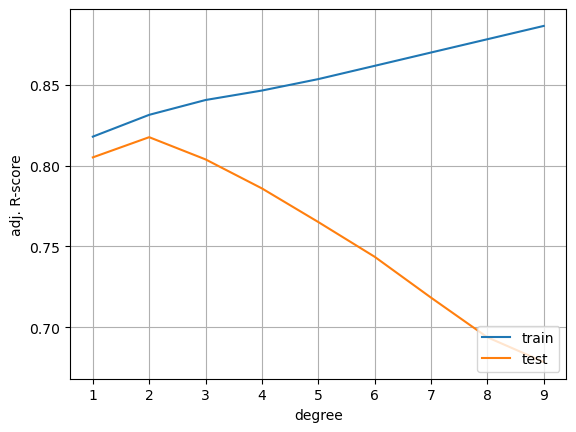

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Same as last lecture
max_degree = 10 # max polynomial degree
train_scores = []
test_scores = []
scaler = StandardScaler()
for degree in range(1, max_degree):
    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, Ridge(alpha=0.05))
    polyreg_scaled.fit(X_train, y_train)
    train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
    test_score= adj_r2(X_test, y_test, polyreg_scaled.score(X_test, y_test))
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure()
plt.plot(list(range(1, 10)), train_scores, label="train")
plt.plot(list(range(1, 10)), test_scores, label="test")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

### 6.2HyperparmeterTunning_lamda

In [68]:

train_scores = []
test_scores = []
rate_list = [0.01, 0.1, 1,5, 10]
scaler = StandardScaler()
for rate in rate_list:
    polyreg_scaled = make_pipeline(PolynomialFeatures(3), scaler, Ridge(alpha=rate))
    polyreg_scaled.fit(X_train, y_train)
    train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
    test_score= adj_r2(X_test, y_test, polyreg_scaled.score(X_test, y_test))
    train_scores.append(train_score)
    test_scores.append(test_score)

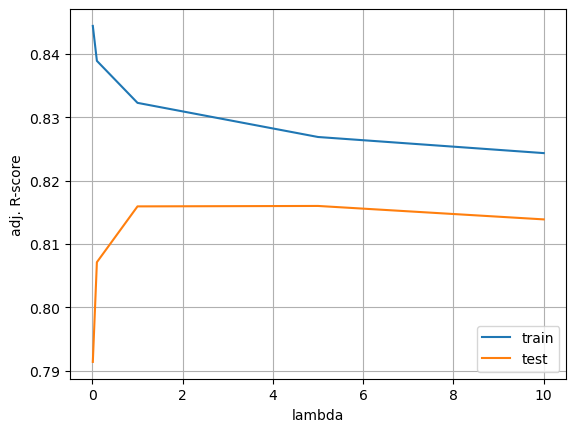

In [69]:
plt.figure()
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, test_scores, label="test")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

### 6.3BestParameterModel

In [70]:
polyreg_scaled = make_pipeline(PolynomialFeatures(2), scaler, Ridge(alpha=1))
polyreg_scaled.fit(X_train, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=1))])

In [71]:
polyreg_scaled

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=1))])

In [72]:
y_train_pred = polyreg_scaled.predict(X_train), 
y_test_pred= polyreg_scaled.predict(X_test)

train_r2 = polyreg_scaled.score(X_train, y_train)
train_adj_r2 = adj_r2(X_train, y_train, train_r2)

test_r2 = polyreg_scaled.score(X_test, y_test)
test_adj_r2 = adj_r2(X_test, y_test, test_r2)

In [73]:
comparision_results['Mod6_PolyReg'] = {
       
        'train_r2' : train_r2,
        'train_adj_r2' : train_adj_r2,
         'test_r2' : test_r2,
        'test_adj_r2' : test_adj_r2,
    }

In [74]:
polyreg_scaled.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=1))])>

In [75]:
polyreg_scaled.named_steps['ridge'].coef_

array([ 0.        ,  0.02875458,  0.0328957 ,  0.00173637,  0.00131996,
        0.04496311,  0.06944195, -0.00024004, -0.00389726, -0.0033463 ,
       -0.00879788,  0.00234316,  0.00975756,  0.00530892, -0.00657572,
       -0.00739883, -0.01041198,  0.01219618, -0.0224382 , -0.00465222,
       -0.00111173,  0.00048263,  0.08154004, -0.01791613, -0.02664364,
        0.01485103, -0.05437359,  0.00494972, -0.00036229,  0.01373636,
        0.00671483, -0.02062011, -0.00987706,  0.00363464,  0.00616779,
       -0.00024004])

In [76]:
polyreg_scaled.feature_names_in_

array(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR',
       'CGPA', 'Research'], dtype=object)

In [77]:
df_weights_polyRigd = pd.DataFrame(zip(polyreg_scaled.feature_names_in_, polyreg_scaled.named_steps['ridge'].coef_[:7])).rename(columns={0: 'features', 1: 'weights_poly'})
df_weights_polyRigd

,features,weights_poly
0,GRE Score,0.000000
1,TOEFL Score,0.028755
2,University Rating,0.032896
3,SOP,0.001736
4,LOR,0.001320
5,CGPA,0.044963
6,Research,0.069442


### Conclusion

### Models_comparision

In [78]:
df_results =pd.DataFrame(comparision_results)
df_results

,model1_ols,model2_lr,model3_Ridge,model4_Lasso,model5_VIF,Mod6_PolyReg
train_mse,0.003329,0.003329,0.003329,0.003394,0.003585,NaN
train_rmse,0.057701,0.057701,0.057701,0.058259,0.059872,NaN
train_mae,0.041351,0.041351,0.041351,0.041687,0.043056,NaN
train_r2,0.829323,0.829323,0.829323,0.826005,0.816237,0.829430
train_adj_r2,0.826275,0.826275,0.826275,0.822898,0.813905,0.826384
test_mse,0.004429,0.004429,0.004429,0.004361,0.004423,NaN
test_rmse,0.066553,0.066553,0.066553,0.066041,0.066505,NaN
test_mae,0.047301,0.047301,0.047301,0.045807,0.045772,NaN
test_r2,0.792752,0.792752,0.792752,0.795927,0.793051,0.829754
test_adj_r2,0.776984,0.776984,0.776984,0.780400,0.782043,0.816800


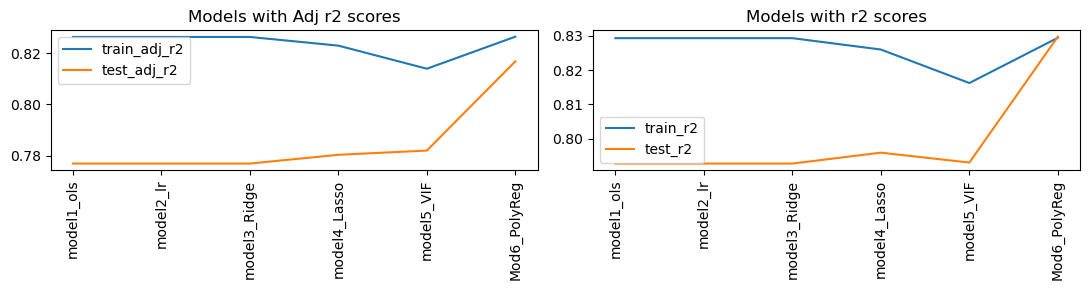

In [79]:
plt.figure(figsize=(11,3), tight_layout=True)
ax1 = plt.subplot(1,2,1)
df_results.loc['train_adj_r2'].plot(label='train_adj_r2')
df_results.loc['test_adj_r2'].plot(label='test_adj_r2')
ax1.legend()
ax1.tick_params(axis='x', rotation=90)
ax1.set_title("Models with Adj r2 scores")

ax2 =  plt.subplot(1,2,2)
df_results.loc['train_r2'].plot(label='train_r2')
df_results.loc['test_r2'].plot(label='test_r2')
ax2.legend()
ax2.tick_params(axis='x', rotation=90)
ax2.set_title("Models with r2 scores")

plt.show()

### Best_fitted_model

is Polynomial Regression of deg 2 where Adj R2 for Train 0.829430 and Test is 0.816800

- It generalizes well with Train and test
- Most Imp feature are are suggested to concentrate more on below
     - CGPA	
     - Research
     - University Rating
     - "TOEFL Score"

In [90]:
## Following are the weights
df_weights_polyRigd

,features,weights_poly
0,GRE Score,0.000000
1,TOEFL Score,0.028755
2,University Rating,0.032896
3,SOP,0.001736
4,LOR,0.001320
5,CGPA,0.044963
6,Research,0.069442


### Mdoels_weights

In [89]:
###  comparision of weighgs obtained from Linear Regression , OLS, Polynomial Regssion on Ridge of deg 2

In [88]:
df_inter = pd.merge(df_weights_lr, df_weights_ols, on='features', how='inner')
pd.merge(df_inter, df_weights_polyRigd, on='features', how='inner')

,features,weights_lr,weights_ols,weights_poly
0,GRE Score,0.023376,0.023376,0.000000
1,TOEFL Score,0.017767,0.017767,0.028755
2,University Rating,0.005559,0.005559,0.032896
3,SOP,0.002049,0.002049,0.001736
4,LOR,0.016925,0.016925,0.001320
5,CGPA,0.067658,0.067658,0.044963
6,Research,0.012267,0.012267,0.069442
